<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1 Load the libraries:

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2. Import the dataset(bank-full.csv)

In [34]:
bank_data=pd.read_csv('bank-full.csv')

Read the first five record by using the head() of the pandas library.

In [35]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3.1 Check the Dimension of data

In [36]:
bank_data.shape # see the shape of the data

(45211, 17)

##### There are 45211 Observations / Rows and 17 Attributes / Columns.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3.2 Check the Information about the data and the datatypes of each respective attributes

In [37]:
bank_data.info() # To see the data type of each of the variable, number of values entered in each of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3.3 Check the data.describe()

In [38]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3.4 Check the missing value

In [39]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

<p>No missing data found</p>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3.5 5 point summary

In [40]:
bank_data_filter=bank_data.loc[:,['age','balance','duration','day','pdays','previous']]

In [41]:
bank_data_filter.head()

,age,balance,duration,day,pdays,previous
0,58,2143,261,5,-1,0
1,44,29,151,5,-1,0
2,33,2,76,5,-1,0
3,47,1506,92,5,-1,0
4,33,1,198,5,-1,0


In [42]:
bank_data_filter.describe()

,age,balance,duration,day,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,15.806419,40.197828,0.580323
std,10.618762,3044.765829,257.527812,8.322476,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,8.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,16.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,21.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,31.000000,871.000000,275.000000


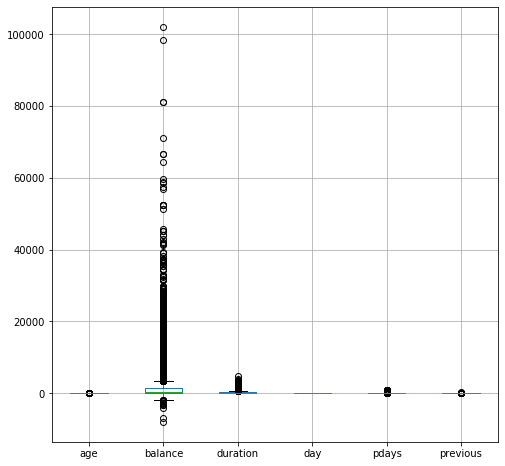

In [43]:
bank_data_filter.boxplot(return_type='axes',figsize=(8,8))

# <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Handling non-numeric(Categorical) data


#### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">One Hot Encoding

In [44]:
bank_data_dummies= pd.get_dummies(bank_data, columns=['month','job','marital','education','default','housing','loan','contact','poutcome','Target']) #This function does One-Hot-Encoding on categorical text

In [45]:
bank_data_dummies.head()

,age,balance,day,duration,campaign,pdays,previous,month_apr,month_aug,month_dec,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Target_no,Target_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0


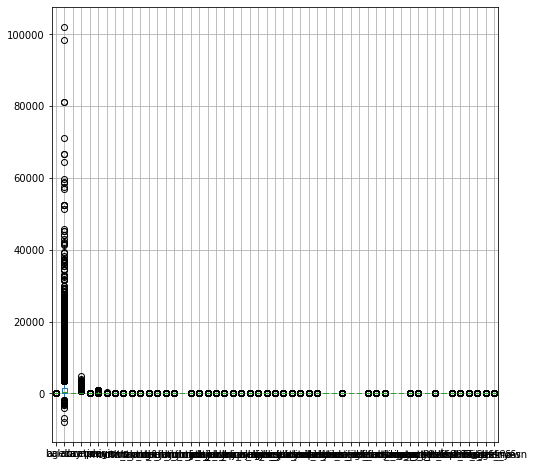

In [46]:
bank_data_dummies.boxplot(return_type='axes',figsize=(8,8))

In [47]:
bank_data_dummies.cov()

,age,balance,day,duration,campaign,pdays,previous,month_apr,month_aug,month_dec,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Target_no,Target_yes
age,112.758107,3.161477e+03,-0.805979,-12.711716,0.156601,-25.260550,0.031512,-0.075580,0.270593,0.016670,...,-0.060980,-0.346824,0.443627,-0.096803,-0.016266,-0.048189,0.067803,-0.003349,-0.085852,0.085852
balance,3161.476700,9.270599e+06,114.095467,16905.750545,-137.513232,1047.321715,116.939527,11.691624,9.040908,4.512891,...,-94.209197,23.095660,28.374284,-51.469945,11.223571,5.093042,19.285355,-35.601968,-51.707943,51.707943
day,-0.805979,1.140955e+02,69.263609,-64.740317,4.189519,-77.535404,-0.991307,0.097978,0.086536,-0.006494,...,0.034711,0.080248,0.048276,-0.128524,-0.177754,-0.054187,-0.045355,0.277296,0.075827,-0.075827
duration,-12.711716,1.690575e+04,-64.740317,66320.574090,-67.471794,-40.349073,0.713654,2.589955,-3.559583,0.336852,...,-1.172514,3.142186,-1.465338,-1.676848,-1.515201,-0.099625,1.962057,-0.347230,-32.654866,32.654866
campaign,0.156601,-1.375132e+02,4.189519,-67.471794,9.597733,-27.492386,-0.234459,-0.052435,0.160767,-0.002687,...,0.011341,-0.047757,0.040948,0.006808,-0.084884,-0.012308,-0.032010,0.129202,0.072859,-0.072859
pdays,-25.260550,1.047322e+03,-77.535404,-40.349073,-27.492386,10025.765774,104.899902,3.567175,-3.712670,0.324633,...,-0.835724,10.809281,0.393057,-11.202338,21.823213,7.711878,4.112941,-33.648032,-3.334742,3.334742
previous,0.031512,1.169395e+02,-0.991307,0.713654,-0.234459,104.899902,5.305841,0.030624,-0.041723,0.005791,...,-0.009331,0.144929,0.015872,-0.160801,0.251091,0.139553,0.083392,-0.474036,-0.069026,0.069026
month_apr,-0.075580,1.169162e+01,0.097978,2.589955,-0.052435,3.567175,0.030624,0.060647,-0.008961,-0.000307,...,-0.002473,0.018311,0.000233,-0.018544,0.009271,0.002935,0.000686,-0.012892,-0.005176,0.005176
month_aug,0.270593,9.040908e+00,0.086536,-3.559583,0.160767,-3.712670,-0.041723,-0.008961,0.119085,-0.000654,...,-0.008780,0.042105,-0.003440,-0.038665,-0.009737,-0.003721,-0.000039,0.013497,0.000947,-0.000947
month_dec,0.016670,4.512891e+00,-0.006494,0.336852,-0.002687,0.324633,0.005791,-0.000307,-0.000654,0.004711,...,-0.000515,0.000783,0.000514,-0.001297,0.000394,0.000382,0.000970,-0.001746,-0.001658,0.001658


## Split Data

In [48]:
# lets build our linear model
# independant variables
X = bank_data_dummies.drop(['Target_no','Target_yes'], axis=1)
# the dependent variable
y = bank_data_dummies[['Target_no','Target_yes']]

In [49]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [54]:
regression_model = LinearRegression(normalize=True)
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [55]:
regression_model.score(X_train, y_train)

0.3063318807476503

## Build Decision Tree Model

In [58]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [59]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8768799764081392


## Reducing over fitting (Regularization)

In [65]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9005276961481341
0.9019463285166618


# Ensemble RandomForest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [70]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.9031259215570628


ValueError: multilabel-indicator is not supported